## Image Matching

Image matching is an important concept in computer vision and object recognition. The images of the same subject can be acquired from different angles, lighting and scales. Therefore, it is best to find features that are descriptive and invariant to the aforementioned variations in order to categorize the images correctly.

SIFT helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

We can also use the keypoints generated using SIFT as features for the image during model training. The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

In [2]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0MB 7.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 163kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from natsort import natsorted
import random
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Now, for each image, we are going to generate the SIFT features. First, we have to construct a SIFT object and then use the function detectAndCompute to get the keypoints. It will return two values – the keypoints and the descriptors.

Next, match the features of each possible pair of images using match() from the BFmatcher (brute force match) module.



In [7]:
file1 = open("/content/drive/MyDrive/temp_edge_8", "w")
path1 = '/content/drive/MyDrive/Images'


sift = cv2.xfeatures2d.SIFT_create(edgeThreshold = 8 )
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    #print(img1)
    img1 = cv2.imread(img1)
    kp1, des1 = sift.detectAndCompute(img1,None)
    if len(kp1)>0:
       for image in natsorted(os.listdir(path1)):
           img2 = os.path.join(path1, image)
        #print(img2)
           str2 = str(image)
           if (img1 != img2): # queryImage
               img2 = cv2.imread(img2) # trainImage
               kp2, des2 = sift.detectAndCompute(img2,None)
            # Initiate SIFT detector
            #sift = cv2.SIFT()            
            # find the keypoints and descriptors with SIFT
            # BFMatcher with default params
               if len(kp1)==0 or len(kp2)==0 or len(kp1)==1 or len(kp2)==1:
                 continue
               matches1 = bf.knnMatch(des1,des2, k=2) 
               matches2 = bf.knnMatch(des2,des1, k=2)
               dis = bf.match(des1,des2)
            #----------------------------------------------
               number_keypoints = 0
               if len(kp1) >= len(kp2):
                   number_keypoints = len(kp1)
               else:
                   number_keypoints = len(kp2)
               good1 = []
               good2 = []
               for m,n in matches1:
                   if m.distance < 0.8*n.distance:
                      good1.append([m])
               for m,n in matches2:
                   if m.distance < 0.8*n.distance:
                      good2.append([m])
            #print("Keypoints 1ST Image: " + str(len(kp1)))
            #print("Keypoints 2ND Image: " + str(len(kp2)))
            #print("GOOD Matches:", len(good))
               score1 = len(good1) / number_keypoints
               score2 = len(good2) / number_keypoints
               score = min(score1, score2)
            #print("How good it's the match: ", score) #* 100, "%")
               file1.write( str1 + " " + str2 + " " + str(score)+"\n")
               print(str1 + " " + str2 + " " + str(score)) # replace with 'cos' if using cosine similarity
file1.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
30_P2_S1_1.jpg 24_P1_S2_1.jpg 0.03636363636363636
30_P2_S1_1.jpg 24_P1_S2_2.jpg 0.043478260869565216
30_P2_S1_1.jpg 24_P1_S2_3.jpg 0.021739130434782608
30_P2_S1_1.jpg 24_P1_S2_4.jpg 0.10869565217391304
30_P2_S1_1.jpg 24_P1_S2_5.jpg 0.021739130434782608
30_P2_S1_1.jpg 25_P1_S1_2.jpg 0.06521739130434782
30_P2_S1_1.jpg 25_P1_S1_3.jpg 0.0
30_P2_S1_1.jpg 25_P1_S1_4.jpg 0.021739130434782608
30_P2_S1_1.jpg 25_P1_S1_5.jpg 0.043478260869565216
30_P2_S1_1.jpg 25_P1_S2_1.jpg 0.043478260869565216
30_P2_S1_1.jpg 25_P1_S2_2.jpg 0.0
30_P2_S1_1.jpg 25_P1_S2_3.jpg 0.021739130434782608
30_P2_S1_1.jpg 25_P1_S2_4.jpg 0.043478260869565216
30_P2_S1_1.jpg 25_P1_S2_5.jpg 0.06521739130434782
30_P2_S1_1.jpg 25_P2_S1_1.jpg 0.025
30_P2_S1_1.jpg 25_P2_S1_2.jpg 0.022727272727272728
30_P2_S1_1.jpg 25_P2_S1_3.jpg 0.0
30_P2_S1_1.jpg 25_P2_S1_4.jpg 0.014705882352941176
30_P2_S1_1.jpg 25_P2_S1_5.jpg 0.008928571428571428
30_P2_S1_1.jpg 25_P2_S2_1.jpg 0.09433962264150944


In [12]:
scores_file = open("/content/drive/MyDrive/temp_edge_8", "r")
content = scores_file.readlines()
for i in range(len(content)):
  content[i]=content[i].split(' ')
  content[i][2] = float(content[i][2][:-1])
content[:10]

[['1_P1_S1_1.jpg', '1_P1_S1_1.jpg', 1.0],
 ['1_P1_S1_1.jpg', '1_P1_S1_2.jpg', 0.0],
 ['1_P1_S1_1.jpg', '1_P1_S1_3.jpg', 0.0],
 ['1_P1_S1_1.jpg', '1_P1_S1_4.jpg', 0.015873015873015872],
 ['1_P1_S1_1.jpg', '1_P1_S1_5.jpg', 0.028985507246376812],
 ['1_P1_S1_1.jpg', '1_P1_S2_1.jpg', 0.0],
 ['1_P1_S1_1.jpg', '1_P1_S2_2.jpg', 0.08333333333333333],
 ['1_P1_S1_1.jpg', '1_P1_S2_3.jpg', 0.0],
 ['1_P1_S1_1.jpg', '1_P1_S2_4.jpg', 0.0],
 ['1_P1_S1_1.jpg', '1_P1_S2_5.jpg', 0.125]]

In [13]:
#Seperating genuine and imposter scores in different lists
genuine = [ x[2] for x in content if x[0].split('_')[0]==x[1].split('_')[0] and x[0]!=x[1]]
imposter = [ x[2] for x in content if x[0].split('_')[0]!=x[1].split('_')[0]] 

In [14]:
#Code to plot probability of imposter and genuine scores 
imposter_count = [0] * 101
imposter_prob = [0] * 101

genuine_count = [0]*101
genuine_prob = [0]*101
len1 = len(imposter)
len2 = len(genuine)
for x in imposter :
  temp1 = int (x/0.01)
  imposter_count[temp1]+=1
for y in genuine :
  temp2 = int (y/0.01)
  genuine_count[temp2]+=1
imposter_prob[:] = [x/ len1 for x in imposter_count]
genuine_prob[:] = [x/ len2 for x in genuine_count]

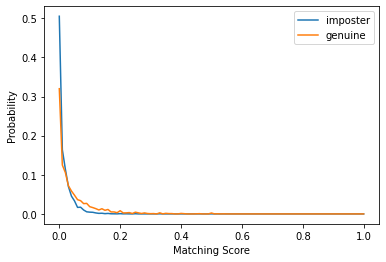

In [15]:
vals = [ 0.001*i for i in range(0, 1010, 10)]
plt.plot(vals,imposter_prob, label = 'imposter')
plt.plot(vals,genuine_prob, label = 'genuine')
plt.xlabel('Matching Score')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [19]:
def gen_thersholds(n):
    """ Generate a list of  n thresholds between 0.0 and 1.0"""
    thersholds = []
    for x in range(1,n+1):
        thersholds.append(float("{:.9f}".format(random.uniform(0.0,1))))

    return sorted(thersholds)

In [30]:
def calculate_scores(num_of_thresholds, imposter, genuine):
    """ Calculates a confusion matrix and then calculates far, frr, tpr, tnr per threshold """

    # generate n number of thresholds
    thresholds = gen_thersholds(num_of_thresholds)

    far = []
    frr = []
    tpr = []
    tnr = []
    
    # for each threshold, calculate confusion matrix.
    for t in thresholds:

        FP = 0
        FN = 0
        TP = 0
        TN = 0

        # go through imposters
        for score in imposter:

            if score >= t:
                # imposter passes as a genuine user
                FP += 1
            else:
                # imposter correctly rejected
                TN += 1

        for score in genuine:
            if score >= t:
                # genuine user correctly identified
                TP += 1
            else:
                # genuine user incorrectly rejected
                FN += 1

        far_current = float(FP) / float(len(imposter))
        frr_current = float(FN) / float(len(genuine))

        tpr_current = float(TP) / float(len(genuine))
        tnr_current = float(TN) / float(len(imposter))

        # calculate our false accept rate(FAR) and add to list
        far.append(far_current)

        # calculate our false reject rate(FRR) and add to list
        frr.append(frr_current)

        tpr.append(tpr_current)
        tnr.append(tnr_current)

    return far, frr, tpr, tnr, thresholds


In [31]:
far, frr, tpr, tnr, thresholds = calculate_scores(1000, imposter, genuine)

In [22]:
def find_EER(far, frr, tpr, tnr, thresholds):
    """ Returns the most optimal FAR and FRR values """

    # The lower the equal error rate value,
    # the higher the accuracy of the biometric system.

    t = []
    far_optimum = 0
    frr_optimum = 0
    tpr_optimum = 0
    tnr_optimum = 0
    threshold_optimum = 0
    num_thresholds = len(thresholds)
    # go through each value for FAR and FRR, calculate
    for i in range(num_thresholds):
        t.append(abs(far[i] + frr[i]))

    # smallest value is most accurate
    smallest = min(t)

    for i in range(num_thresholds):
        if smallest == abs(far[i] + frr[i]):

            # Found EER
            far_optimum = far[i]
            frr_optimum = frr[i]
            tpr_optimum = tpr[i]
            tnr_optimum = tnr[i]
            threshold_optimum = thresholds[i]
            break

    return far_optimum, frr_optimum, tpr_optimum, tnr_optimum, threshold_optimum


In [23]:
far_optimum, frr_optimum, tpr_optimum, tnr_optimum, threshold_optimum = find_EER(far, frr, tpr, tnr, thresholds)
far_optimum, frr_optimum, tpr_optimum, tnr_optimum, threshold_optimum
accuracy = 1-(far_optimum+frr_optimum)/2
accuracy*100

61.796325153108214

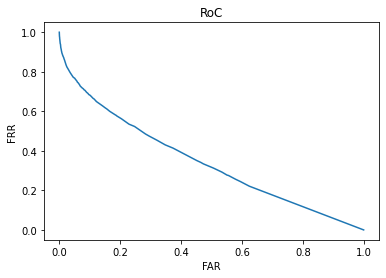

In [24]:
#Plotting RoC curve
FAR = [1] + far
FRR = [0] + frr
plt.plot(FAR, FRR)
plt.title('RoC')
plt.xlabel('FAR')
plt.ylabel('FRR')
plt.show()

In [25]:
file_gen = open("/content/drive/MyDrive/genuine_edge_8.txt", "w")
file_imp = open("/content/drive/MyDrive/imposter_edge_8.txt", "w")

for g in genuine:
  file_gen.write(str(g)+"\n")
for i in imposter:
  file_imp.write(str(i)+"\n")

file_gen.close()
file_imp.close()

In [26]:
!pip install pyeer

     |████████████████████████████████| 614kB 6.8MB/s 
  Created wheel for pyeer: filename=pyeer-0.5.4-cp37-none-any.whl size=603835 sha256=1de911912ae713190db1cee3a330ec06ccff55ef5639755dda8e1d4445039ed4
  Stored in directory: /root/.cache/pip/wheels/8c/26/2e/39ca25f59deb5f470fbb378f70b79033719582d9c894e9803f
Successfully built pyeer


In [27]:
#Using PyEER library to generate comprehensive report for given imposter and genuine scores 
!geteerinf -p "/content/drive/MyDrive/" -i "imposter_edge_8.txt" -g "genuine_edge_8.txt" -e "SIFT_Modified" -pf "pdf" -rf "tex"

SIFT_Modified: Loading genuine scores file...
SIFT_Modified: Loading impostor scores file...
SIFT_Modified: Calculating stats...
Generating report...
Plotting...


In [28]:
#Calculating CRR assuming matching within sessions
Dict = {}
for ele in content:
  if not ele[0] in Dict:
    if ele[0]!=ele[1]:
      Dict[ele[0]] = [ele[1], ele[2]]
  elif ele[1]!=ele[0] and Dict[ele[0]][1]<ele[2]:
    Dict[ele[0]] = [ele[1], ele[2]]
count = 0
for key, value in Dict.items():
  if key.split('_')[0]==value[0].split('_')[0]:
    count+=1
crr = count/len(Dict)
crr

0.585635359116022

In [29]:
#Calculating CRR assuming matching only between sessions
Dict1 = {}
for ele in content:
  if not ele[0] in Dict1:
    if ele[0]!=ele[1] and ele[0].split('_')[2]=='S2' and ele[1].split('_')[2]=='S1':
      Dict1[ele[0]] = [ele[1], ele[2]]
  elif ele[1]!=ele[0] and Dict1[ele[0]][1]<ele[2] and ele[0].split('_')[2]=='S2' and ele[1].split('_')[2]=='S1':
    Dict1[ele[0]] = [ele[1], ele[2]]
count = 0
for key, value in Dict1.items():
  if key.split('_')[0]==value[0].split('_')[0]:
    count+=1
crr = count/len(Dict1)
crr

0.12087912087912088